#  Bay Wheels's trip data - 2019 Analysis
## by Jaroslav Tran

## Investigation Overview
### Introduction
Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States (source: Wikipedia)

### Goal
The overall goal of this presentation is to explore a FordBike 2019 dataset and showcase key differences between two User Types of this service: Customers and Subscribers.

### Dataset Overview

The dataset contains BayWheels trip data available for public use. It contains over 2.5M data points and 15 variables for the year of 2019. To aggregate it, I needed to download datasets for each month in 2019 and merge them together into a master dataset. The monthly datasets are available here: https://www.lyft.com/bikes/bay-wheels/system-data </li>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore");

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordgobike2019_cleaned.csv', low_memory=False);

## Hour by hour bike trips breakdown by user type
First, let´s take a look into what are the peak times and generally, when the most and least bike trips happen and how it differs for each user type:
<ul> 
     <li> From the chart below, it is clear that Subscribers are mostly daily commuters who use this service as a healthier alternative to driving a car or taking a public transportations as the peak times are around 8-9 am and 5-6 pm. </li>
     <li> Customers also have peaks around those times but the demand over the day is more or less consistent so I would assume that those are most likely tourist and use bikes for their bay area visit and trips </li>
</ul>

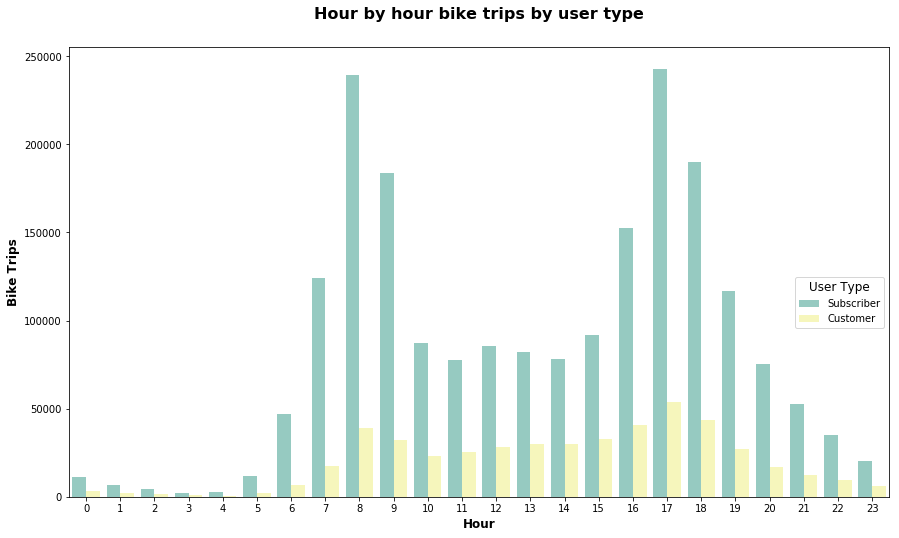

In [11]:
# Generating seaborn countplot
plt.figure(figsize=[14.70, 8.27])
hourly_bike_trips_by_user = sb.countplot(data = df, x = 'hour_start_time', hue = 'user_type', palette = 'Set3')

# Adding labels, legend and title
plt.xlabel("Hour", fontsize = 12, weight = "bold")
plt.ylabel("Bike Trips", fontsize = 12, weight = "bold")
plt.legend(bbox_to_anchor=(1, 0.5), title="User Type", title_fontsize = 12);
plt.title("Hour by hour bike trips by user type", y=1.05, fontsize=16, fontweight="bold");

## Weekday bike trips by User Type

Now, let´s take a look whether our assumptions of subscribers = daily commuters and customers = tourists hold true in the weekday bike trip distribution.

<ul>
    <li> Our "segmentation" between the daily commuters (Subscribers) and tourists (Customers) is further highlighted by the weekday bike trips breakdown below. </li>
    <li> Where the commuters(subscribers) clearly have the most bike trips during the workweek (Mon-Fri) whereas tourists(customers) demand for the bikes is more or less the same every day. </li>
</ul>

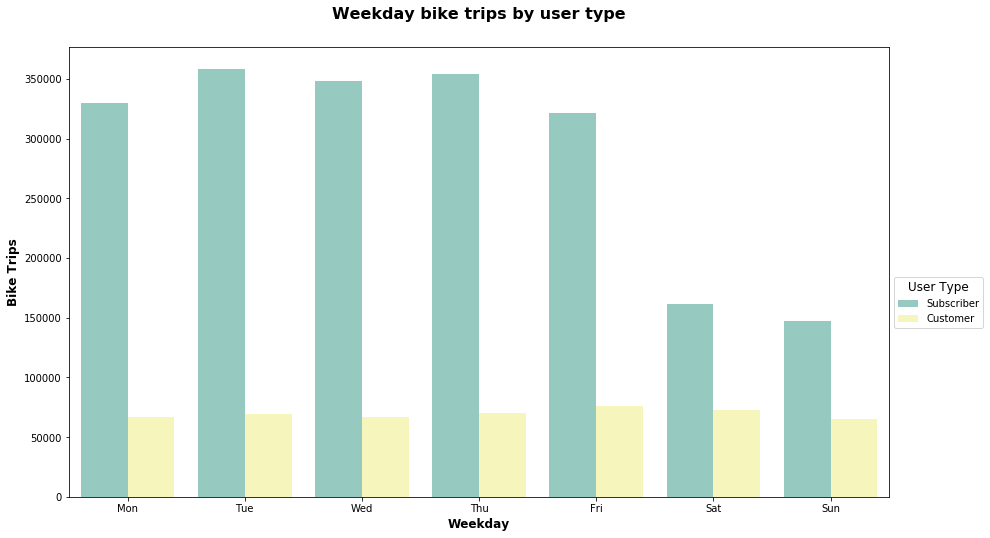

In [14]:
# Generating seaborn countplot with a nice palette and setup a plot size
plt.figure(figsize=[14.70, 8.27])
weekly_bike_trips_by_user = sb.countplot(data = df, x = 'weekday_start_time', hue = 'user_type', palette = 'Set3',
                                        order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Adding labels and title
plt.xlabel("Weekday", fontsize = 12, weight = "bold")
plt.ylabel("Bike Trips", fontsize = 12, weight = "bold")
plt.legend(bbox_to_anchor=(1, 0.5), title="User Type", title_fontsize = 12);
plt.title("Weekday bike trips by user type", y=1.05, fontsize=16, fontweight="bold");

##  Analyzing hour by hour trip duration by user type
We know now at what times and what hours most trips happened. Let´s take a look at trip durations each hour for both groups. 

<ul>
    <li> What is quite interesting is that the longest trip for both Subscribers and Customers happen around 3 AM in the morning. It would be interesting to look deeper and find out why. (Hypothesis: Maybe they are using the bikes after parties?)</li>
  </ul>  

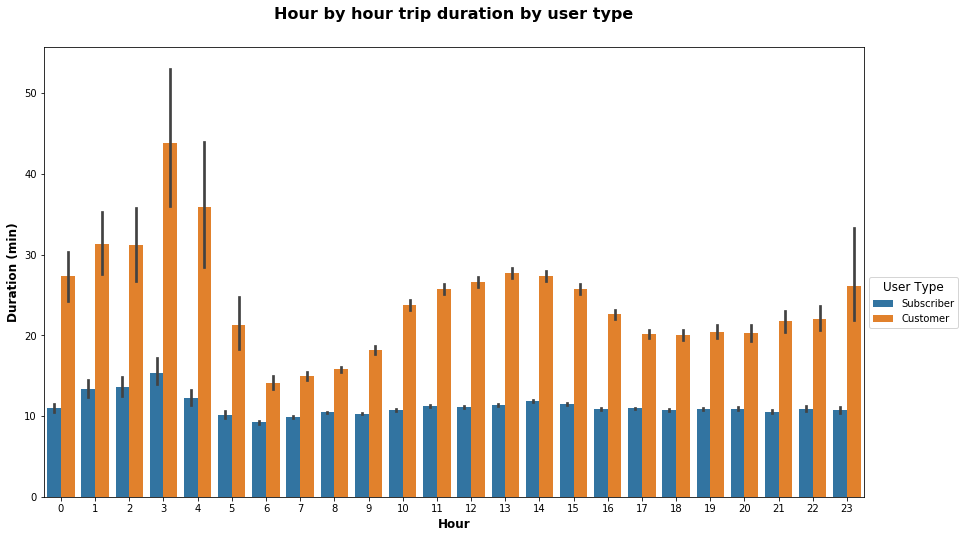

In [16]:
# Generating pointplot and assigning x,y and z(hue) variables
plt.figure(figsize=[14.70, 8.27])
hour_dur_per_user_type = sb.barplot(data = df, x = 'hour_start_time', y = 'duration_min', hue = 'user_type', 
                                    dodge = 0.3)

# Setting up labels and titles
plt.xlabel("Hour", fontsize = 12, weight = "bold")
plt.ylabel("Duration (min)", fontsize = 12, weight = "bold")
plt.legend(bbox_to_anchor=(1, 0.5), title="User Type", title_fontsize = 12);
plt.title("Hour by hour trip duration by user type", y=1.05, fontsize=16, fontweight="bold");

##  Analyzing weekday trip duration by user type
3 am duration peak times are strange so let´s see how the duration looks each weekday. 
<ul>
    <li> My hypothesis about the reason behind the exceptionally long duration in the morning 3am hour is further supported by the weekday trip duration breakdown by user type.</li>
    <li> We can clearly see that the duration for both groups (especially the customers) is much higher during the weekend.</li>
</ul>

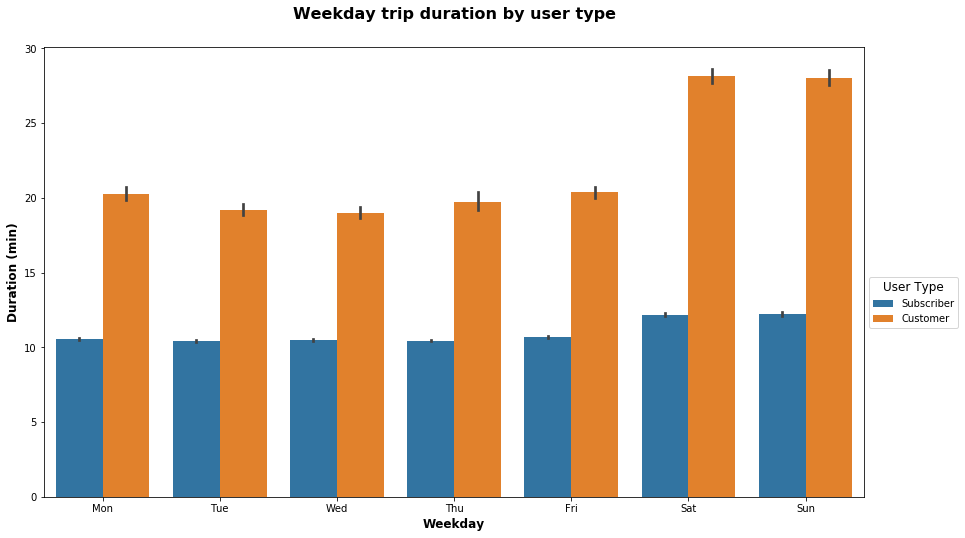

In [17]:
# Generating pointplot and assigning x,y and z(hue) variable
plt.figure(figsize=[14.70, 8.27])
weekday_dur_per_user_type = sb.barplot(data = df, x = 'weekday_start_time', y = 'duration_min', hue = 'user_type',
                  dodge = 0.3, order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Setting up labels and titles
plt.xlabel("Weekday", fontsize = 12, weight = "bold")
plt.ylabel("Duration (min)", fontsize = 12, weight = "bold")
plt.legend(bbox_to_anchor=(1, 0.5), title="User Type", title_fontsize = 12);
plt.title("Weekday trip duration by user type", y=1.05, fontsize=16, fontweight="bold");